# KOJO CLARKE 12507943

*Back in 2007, using a platform called Long Bets (longbets.org – a non-profit seeded by Amazon’s Jeff Bezos), Warren proposed what seemed like a preposterous bet. He believed that over the ensuing 10-years, active investment management by professionals would, in aggregate, “underperform the returns achieved by rank amateurs who simply sat still.”*

## Research question/interests

**In the long term, do mutual funds provide better returns than the S&P 500 index?**


This investigation focuses on gauging mutual fund results against the S&P 500. A mutual fund is an investment instrument that seeks to beat the S&P 500 index through active management. Both mutual fund and S&P 500 index returns data from the last 10 years will be used in the study.

Updated Plan of Analysis: This study will compare mutual fund returns to those of the S&P 500 index over the previous 10 years using statistical methodologies. As part of the study, I will determine the yearly returns of mutual funds and the S&P 500 index. I will clean up the data to track only the funds that out performed the S&P 500 in the year 2009 to remove the smaller institiutions. My hypothesis is those who were capable in outperforminf the S & P were able to do so after the 2008 recession. I will then visualise the data to track each funds returns until 2020 to see had done well in the long run before another golbal recession. I will then see if there are any funds who have out perfomed, what other finacial intstruments can be used to determine why. I will eventually  link both data sets togther to track who has historically been the winner in the long run.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('../data/raw/MutualFunds.csv')
df2 = pd.read_csv('../data/raw/sp-500-historical-annual-returns.csv')
df1.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA (Exploratory Data Analysis)
I have had to use another data set that tracks the value of the S&P 500:



In [ ]:
df2


,date,value
0,1928-12-31,37.88
1,1929-12-31,-11.91
2,1930-12-31,-28.48
3,1931-12-31,-47.07
4,1932-12-31,-15.15
...,...,...
91,2019-12-31,28.88
92,2020-12-31,16.26
93,2021-12-31,26.89
94,2022-12-31,-19.44


Trying to discover the relavant columns from the data set:


In [ ]:
df1.shape

(23783, 298)

In [ ]:
print(df1.columns.tolist())

['fund_symbol', 'quote_type', 'region', 'fund_short_name', 'fund_long_name', 'currency', 'initial_investment', 'subsequent_investment', 'fund_category', 'fund_family', 'exchange_code', 'exchange_name', 'exchange_timezone', 'management_name', 'management_bio', 'management_start_date', 'total_net_assets', 'year_to_date_return', 'day50_moving_average', 'day200_moving_average', 'week52_high_low_change', 'week52_high_low_change_perc', 'week52_high', 'week52_high_change', 'week52_high_change_perc', 'week52_low', 'week52_low_change', 'week52_low_change_perc', 'investment_strategy', 'fund_yield', 'morningstar_overall_rating', 'morningstar_risk_rating', 'inception_date', 'last_dividend', 'last_cap_gain', 'annual_holdings_turnover', 'investment_type', 'size_type', 'fund_annual_report_net_expense_ratio', 'category_annual_report_net_expense_ratio', 'fund_prospectus_net_expense_ratio', 'fund_prospectus_gross_expense_ratio', 'fund_max_12b1_fee', 'fund_max_front_end_sales_load', 'category_max_front_e

 Way too many columns so only going to focus on fund_returns YYYY:

In [ ]:
columns_to_keep = ['fund_long_name',' fund_short_name', 'fund_family', 'fund_symbol', 'fund_category', 'last_dividend', 'fund_return_2020', 'fund_return_2020', 'fund_return_2019', 'fund_return_2018', 'fund_return_2017', 'fund_return_2016', 'fund_return_2015', 'fund_return_2014', 'fund_return_2013', 'fund_return_2012', 'fund_return_2011', 'fund_return_2010', 'fund_return_2009', 'fund_return_2008', 'fund_return_2007', 'fund_return_2006', 'fund_return_2005', 'fund_return_2004',  'fund_return_2003',  'fund_return_2002', 'fund_return_2001', 'fund_return_2000']
df1 = df1.drop(columns=df1.columns.difference(columns_to_keep), axis=1)
df1.head()

,fund_symbol,fund_long_name,fund_category,fund_family,last_dividend,fund_return_2020,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,...,fund_return_2009,fund_return_2008,fund_return_2007,fund_return_2006,fund_return_2005,fund_return_2004,fund_return_2003,fund_return_2002,fund_return_2001,fund_return_2000
0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,0.14660,0.03703,0.21426,-0.05369,0.14672,0.04008,...,0.25582,-0.27129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAEX,Virtus AllianzGI Health Sciences Fund Class P,Health,Virtus,0.24262,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAFX,American Century One Choice Blend+ 2015 Portfo...,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,Thrivent Large Cap Growth Fund Class A,Large Growth,Thrivent Funds,NaN,0.42443,0.31610,0.01475,0.27701,-0.02261,...,0.39249,-0.42808,0.15774,0.06325,0.06554,0.07809,0.2895,-0.30137,-0.24329,-0.1436
4,AAAHX,American Century One Choice Blend+ 2015 Portfo...,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks better but need to drop null values to use relevant data:

In [ ]:
df1Filtered = df1.dropna()
df1Filtered = df1Filtered.reset_index().drop('index', axis=1)

df1Filtered

,fund_symbol,fund_long_name,fund_category,fund_family,last_dividend,fund_return_2020,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,...,fund_return_2009,fund_return_2008,fund_return_2007,fund_return_2006,fund_return_2005,fund_return_2004,fund_return_2003,fund_return_2002,fund_return_2001,fund_return_2000
0,AABCX,Putnam Dynamic Asset Allocation Balanced Fund ...,Allocation--50% to 70% Equity,Putnam,0.01100,0.11605,0.16498,-0.07915,0.14401,0.05869,...,0.34189,-0.33752,0.01070,0.11842,0.06138,0.08009,0.20376,-0.12814,-0.07137,-0.03389
1,AABPX,American Beacon Balanced Fund Investor Class,Allocation--50% to 70% Equity,American Beacon,0.04090,0.06118,0.22092,-0.08189,0.12182,0.12039,...,0.20247,-0.25004,0.01778,0.13569,0.06188,0.12749,0.23784,-0.07562,0.05348,0.10429
2,AADBX,American Beacon Balanced Fund R5 Class,Allocation--50% to 70% Equity,American Beacon,0.05060,0.06372,0.22555,-0.08028,0.12496,0.12524,...,0.20745,-0.24885,0.02053,0.13848,0.06530,0.13091,0.24258,-0.07490,0.05587,0.10572
3,AADEX,American Beacon Large Cap Value Fund R5 Class,Large Value,American Beacon,0.49170,0.03264,0.29667,-0.11987,0.17072,0.15984,...,0.27515,-0.39388,0.03178,0.19015,0.09934,0.19434,0.35755,-0.15889,0.02095,0.11438
4,AAGOX,Alger Large Cap Growth Portfolio Class I-2,Large Growth,Alger,0.15240,0.67028,0.27431,0.02207,0.28464,-0.00828,...,0.47571,-0.46154,0.19945,0.05176,0.12005,0.05497,0.35160,-0.32991,-0.11815,-0.14775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,WVCCX,Fidelity Advisor Consumer Discretionary Fund C...,Foreign Small/Mid Growth,Fidelity Investments,0.34226,0.26062,0.23710,-0.09600,0.31752,0.04969,...,0.36799,-0.46214,-0.03686,0.13983,0.14997,0.17944,0.44598,-0.34522,-0.27137,-0.16267
2767,WWNPX,Fidelity Conservative Income Bond Institutiona...,Mid-Cap Growth,Fidelity Investments,0.17530,0.03319,0.30478,-0.05549,0.28408,0.20455,...,0.41020,-0.53174,0.21144,0.27813,0.16111,0.20926,0.47771,-0.04618,0.02117,0.03900
2768,WYMHX,Fidelity Conservative Income Municipal Bond Fund,High Yield Muni,Fidelity Investments,0.01568,0.04392,0.06017,0.01913,0.04421,0.00908,...,0.32556,-0.17862,0.00088,0.07099,0.07330,0.06877,0.05220,0.05883,0.05029,0.05226
2769,YACKX,Franklin Adjustable U.S. Government Securities...,Large Value,Franklin Templeton Investments,0.28240,0.15281,0.17659,0.02689,0.18230,0.11201,...,0.59314,-0.26055,0.03387,0.15954,-0.01297,0.09934,0.33030,0.11414,0.19463,0.13462


Less columns and can work on using describe and other methods on both dataframes:



In [ ]:
df1Filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
last_dividend,2771.0,0.115261,0.364794,0.00000,0.014730,0.02647,0.100550,13.58260
fund_return_2020,2771.0,0.081016,0.104905,-0.71199,0.035170,0.05747,0.116965,0.70597
fund_return_2019,2771.0,0.160754,0.104390,-0.50568,0.070150,0.14797,0.247855,0.54858
fund_return_2018,2771.0,-0.050862,0.068646,-0.45781,-0.086615,-0.03303,0.003660,0.18705
fund_return_2017,2771.0,0.113464,0.099792,-0.45057,0.040305,0.07933,0.175445,0.59370
fund_return_2016,2771.0,0.068158,0.088013,-0.40527,0.006615,0.04606,0.114070,0.75079
fund_return_2015,2771.0,-0.013397,0.054262,-0.36824,-0.031640,-0.00263,0.018580,0.20828
fund_return_2014,2771.0,0.057976,0.075517,-0.40546,0.020005,0.05922,0.101295,0.36080
fund_return_2013,2771.0,0.115295,0.169877,-0.52880,-0.021500,0.06214,0.274785,0.86661
fund_return_2012,2771.0,0.112082,0.069106,-0.35353,0.064665,0.11312,0.157185,0.39609


Mutual Funds returns are calculated by computing appreciation in the value of your investment over a period as compared to the initial investment made. This currently being shown as a decimal increase or decrease. Here is a link that helped with my understanding: https://www.mutualfundssahihai.com/en/how-do-i-get-my-returns-mutual-funds

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
value,96.0,7.676563,19.076601,-47.07,-6.015,10.525,20.64,46.59


In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2['year'] = df2['date'].dt.year
df2

,date,value,year
0,1928-12-31,37.88,1928
1,1929-12-31,-11.91,1929
2,1930-12-31,-28.48,1930
3,1931-12-31,-47.07,1931
4,1932-12-31,-15.15,1932
...,...,...,...
91,2019-12-31,28.88,2019
92,2020-12-31,16.26,2020
93,2021-12-31,26.89,2021
94,2022-12-31,-19.44,2022


There is only two columns in df2 but it currently just tracks the value of the stock as a percent. For further analysis, percentages must be used to compare.

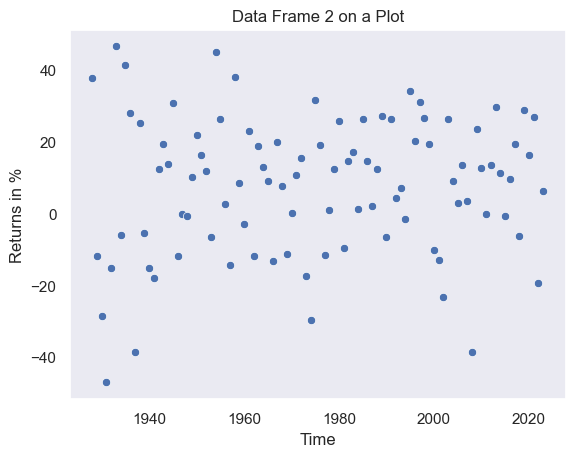

In [ ]:
sns.set_theme(style="dark", font_scale=1)
df2_scatter = sns.scatterplot(data=df2, x='year', y=' value')
df2_scatter.set(title='Data Frame 2 on a Plot',
                     xlabel='Time',
                     ylabel='Returns in %')
plt.show()

A cumilitative returns column would better show any relationship perhaps - will update the research question

In [ ]:
df2['cumulative_value'] = df2[' value'].cumsum()
df2

,date,value,year,cumulative_value
0,1928-12-31,37.88,1928,37.88
1,1929-12-31,-11.91,1929,25.97
2,1930-12-31,-28.48,1930,-2.51
3,1931-12-31,-47.07,1931,-49.58
4,1932-12-31,-15.15,1932,-64.73
...,...,...,...,...
91,2019-12-31,28.88,2019,707.00
92,2020-12-31,16.26,2020,723.26
93,2021-12-31,26.89,2021,750.15
94,2022-12-31,-19.44,2022,730.71


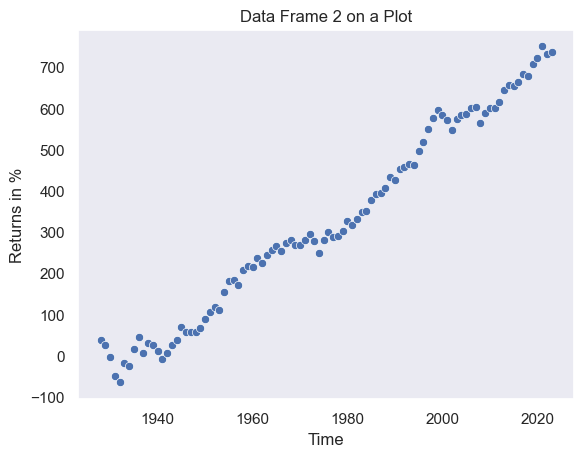

In [ ]:
df2_scatter = sns.scatterplot(data=df2, x='year', y='cumulative_value')
df2_scatter.set(title='Data Frame 2 on a Plot',
                     xlabel='Time',
                     ylabel='Returns in %')
plt.show()

Much betteerrrr. Since this is eda i will clean up the axis in my next Milestone however will start on the mutual fund visulisations. In DF1 however i would like to see which fund has the better return in 2009

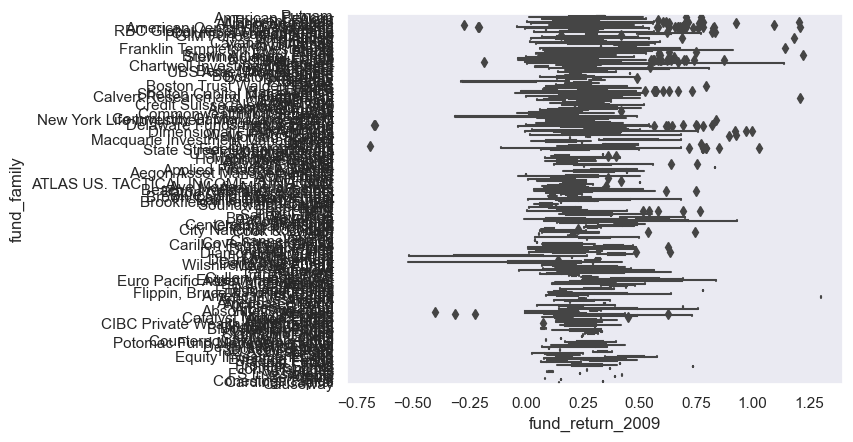

In [ ]:
df1_bar = sns.boxplot(data=df1Filtered, x='fund_return_2009', y='fund_family')


Way too many funds and categories and families so need to filter out the less succesful ones. This made me realise that the data set for these funds are huge and more filtering is required. I shall use those who underpefromed in 20009 which has the Highest Max and 2008 which have had the lowest min.

In [ ]:
mean = df1Filtered['fund_return_2009'].mean()
df = df1Filtered[df1Filtered['fund_return_2009'] >= mean]
mean2 = df['fund_return_2008'].mean()
df1fin = df[df['fund_return_2008'] >= mean2]
df1fin.shape

(547, 26)

In [ ]:
df1fin['fund_family'].describe


<bound method NDFrame.describe of 0                               Putnam
15        American Century Investments
17                               Alger
27                             Invesco
31        American Century Investments
                     ...              
2759    Franklin Templeton Investments
2765                    Frontier Funds
2768              Fidelity Investments
2769    Franklin Templeton Investments
2770                            Nuveen
Name: fund_family, Length: 547, dtype: object>

547 funds to work with hopefully looks better when i put it on a bar plot:

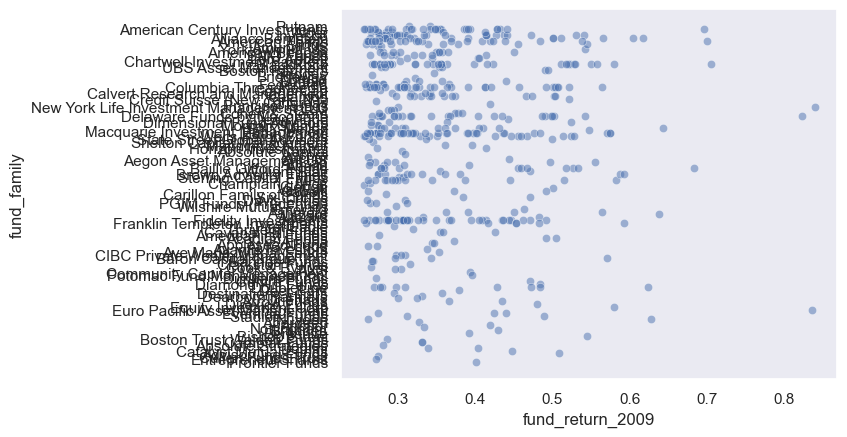

In [ ]:
df1_bar = sns.scatterplot(data=df1fin, x='fund_return_2009', y='fund_family', alpha=0.5)

Too clustered however I can see a relationship. One more filter however it would be to see the returns of the funds who beat the S&P 500 in 2009 in one std deviation

In [ ]:
df2[df2["date"] == "2009-12-31"]

,date,value,year,cumulative_value
81,2009-12-31,23.45,2009,588.95


In [ ]:
df1new = df1fin[df1fin['fund_return_2009'] >= 0.4345]
df1new

,fund_symbol,fund_long_name,fund_category,fund_family,last_dividend,fund_return_2020,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,...,fund_return_2009,fund_return_2008,fund_return_2007,fund_return_2006,fund_return_2005,fund_return_2004,fund_return_2003,fund_return_2002,fund_return_2001,fund_return_2000
52,AFRAX,Invesco Floating Rate ESG Fund Class A,Bank Loan,Invesco,0.02077,0.01513,0.07224,-0.00190,0.03943,0.11150,...,0.47271,-0.33835,0.00954,0.07017,0.04999,0.06361,0.07062,0.02755,-0.01485,0.05032
53,AGDAX,AB High Income Fund Class A,High Yield Bond,AllianceBernstein,0.04203,0.02914,0.13666,-0.05775,0.07908,0.15171,...,0.61741,-0.26516,0.07290,0.11847,0.10157,0.11086,0.38419,0.18695,0.06097,0.14472
54,AGDCX,AB High Income Fund Class C,High Yield Bond,AllianceBernstein,0.03602,0.02103,0.12786,-0.06638,0.07127,0.14270,...,0.60490,-0.27203,0.06450,0.11081,0.09259,0.10267,0.37370,0.17562,0.05248,0.13410
60,AHITX,American Funds American High-Income Trust Class A,High Yield Bond,American Funds,0.03358,0.06984,0.11815,-0.01836,0.06697,0.16315,...,0.48417,-0.27517,0.01531,0.12190,0.03630,0.09777,0.28734,-0.03553,0.07489,-0.03370
61,AHYCX,Invesco High Yield Fund Class C,High Yield Bond,Invesco,0.01260,0.02821,0.12153,-0.04292,0.05524,0.10495,...,0.53012,-0.25820,0.00362,0.10039,0.01710,0.10114,0.29282,-0.10882,-0.04515,-0.24395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,VHYLX,Arrow DWA Tactical: Macro Fund Class C,High Yield Bond,Arrow Funds,0.30760,0.06732,0.14972,-0.03229,0.07912,0.12895,...,0.43501,-0.31293,0.01472,0.12331,0.07243,0.15884,0.29975,-0.01822,0.06008,-0.05994
2742,WHIYX,Fidelity Advisor Energy Fund Class I,High Yield Bond,Fidelity Investments,0.03241,0.05318,0.11250,-0.02715,0.07997,0.16740,...,0.46186,-0.19941,0.04355,0.10786,0.01538,0.08546,0.19175,0.02462,0.10809,-0.06843
2759,WRHIX,Franklin California High Yield Municipal Fund ...,High Yield Bond,Franklin Templeton Investments,0.02799,0.04584,0.10462,-0.03405,0.07224,0.15917,...,0.45283,-0.20788,0.03247,0.09695,0.00594,0.07577,0.18101,0.01531,0.09926,-0.07443
2769,YACKX,Franklin Adjustable U.S. Government Securities...,Large Value,Franklin Templeton Investments,0.28240,0.15281,0.17659,0.02689,0.18230,0.11201,...,0.59314,-0.26055,0.03387,0.15954,-0.01297,0.09934,0.33030,0.11414,0.19463,0.13462


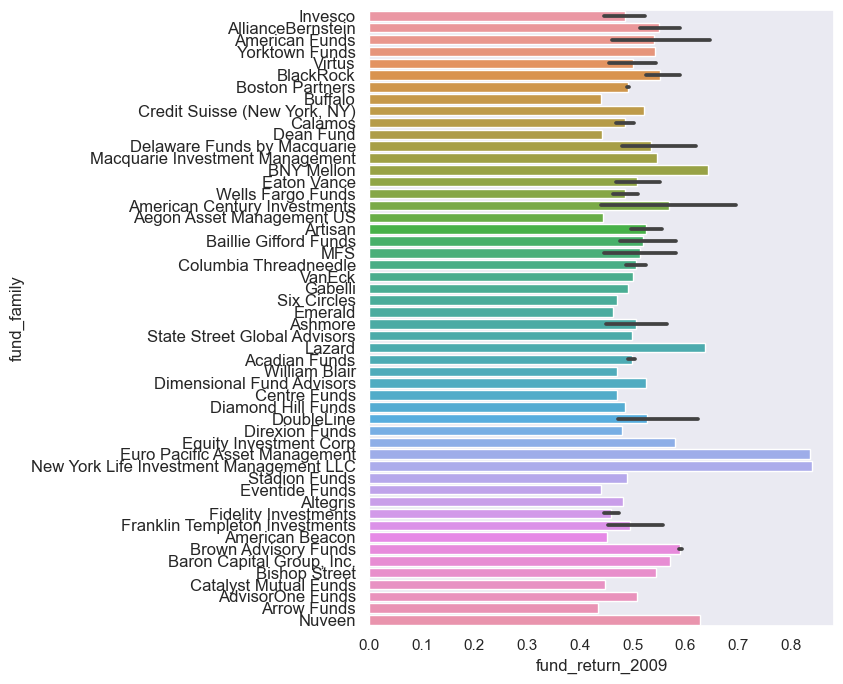

In [ ]:
df1_bar = sns.barplot(data=df1new, x='fund_return_2009', y='fund_family', alpha=1)
fig = plt.gcf()
fig.set_size_inches(6, 8)


df1_bar.yaxis.set_tick_params(labelsize=12)

plt.show()

After trimmng it down again, a bit cluttered but has definitely inspired my analysis and research. Will require clean up in next milestone but will save current data sets in processed folder.

In [ ]:
df1new.to_csv('../data/processed/MutualFund', index=False)


In [ ]:
df2.to_csv('../data/processed/S&P', index=False)